## Python statistics essential training - 05_04_crossvalidation

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Model formulas from the last two videos

In [9]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving'
         '+ age5_surviving:region - age5_surviving + population')

In [10]:
shuffled = gdata.sample(len(gdata))

In [11]:
shuffled.head(5)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
1022,Bangladesh,1985,Asia,93015182.0,55.47,82.65,5.52,1142.0,3.126626
14628,Zambia,1985,Africa,7017292.0,55.54,83.30,6.80,2602.0,7.123888
12522,Suriname,1985,America,371469.0,68.98,94.59,3.34,11162.0,30.559890
12684,Sweden,1985,Europe,8350814.0,76.72,99.24,1.74,28202.0,77.212868
10983,Rwanda,1985,Africa,6117966.0,49.15,84.08,8.28,962.0,2.633812


In [ ]:
gdata.head(5)

In [12]:
len(gdata)

182

In [13]:
len(shuffled)

182

In [14]:
training,testing = shuffled.iloc[:len(gdata)//2],shuffled.iloc[:len(gdata)//2]

In [15]:
surviving = smf.ols(f_surviving,data=training).fit()

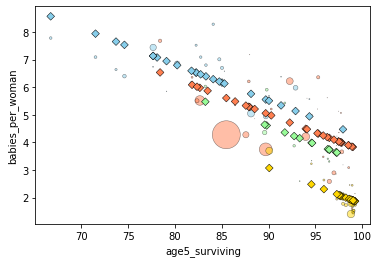

In [16]:
plotfit(surviving,training)

In [17]:
len(training)

91

In [18]:
surviving.mse_resid

0.7783684501556518

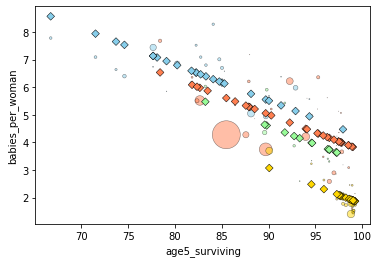

In [19]:
plotfit(surviving,testing)

In [20]:
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model -1
np.sum(resid**2)/df

0.7783684501556516

In [21]:
surviving.df_model

4.0

In [22]:
def cross_validate(data, formula, response, n =100):
    ret = []
    for i in range(n):
        shuffled = data.sample(len(data))
        training,testing = shuffled.iloc[:len(data)//2],shuffled.iloc[:len(data)//2]
        trained = smf.ols(formula, data = training).fit()
        resid = trained.predict(testing)-testing[response]
        df = len(testing)-trained.df_model-1
        mse = np.sum(resid**2)/df
        ret.append(mse)
    return np.mean(ret)
        

In [23]:
cross_validate(gdata,f_groupmeans,'babies_per_woman')

1.482914304562125

In [24]:
cross_validate(gdata,f_surviving,'babies_per_woman')

0.9500930918965937

In [25]:
cross_validate(gdata,f_srp,'babies_per_woman')

0.8310545966616278